## Infograpghic Code

By:
    
    Muneeb Ur Rehman (202130779)
    Tajrian Rushat (201909553)

#### Video Presentation Link:

https://youtu.be/lsrhVRiLSdE

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('satcat.tsv', sep='\t', low_memory=False)

In [3]:
df['Launch_Year'] = pd.to_datetime(df['LDate'], errors='coerce').dt.year

df = df[df['Launch_Year'].notna()]

launch_counts = df.groupby('Launch_Year').size().rename("Launch_Count")

cumulative_counts = launch_counts.cumsum().rename("Cumulative_Count")

launch_trends = pd.concat([launch_counts, cumulative_counts], axis=1)

### Visualization 1:

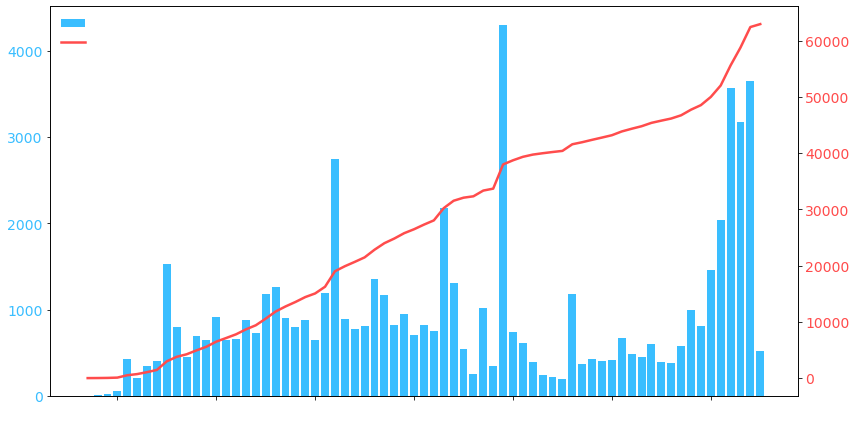

In [4]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# The legend text and X ticks have been given White color, because the inforgraphic background is Black.
# The X label was removed because it is obvious and for tidiness

ax1.bar(launch_trends.index, launch_trends['Launch_Count'], color='#3ABEFF', alpha=1, label='Launch Count')
ax1.tick_params(axis='x', labelcolor='white',labelsize=14) 
ax2 = ax1.twinx()
ax2.plot(launch_trends.index, launch_trends['Cumulative_Count'], color='#FF4C4C', alpha=1, label='Cumulative Count', linewidth=2.5)

legend1, labels1 = ax1.get_legend_handles_labels()
legend2, labels2 = ax2.get_legend_handles_labels()

combined_legend1 = legend1 + legend2
combined_labels = labels1 + labels2

ax1.tick_params(axis='y', labelcolor='#3ABEFF',labelsize=14)
ax2.tick_params(axis='y', labelcolor='#FF4C4C',labelsize=14)

# Title editied in photo editor
# ax1.set_title('Space Activity 1958 to 2024')

legend = ax1.legend(combined_legend1, combined_labels, loc='upper left', fontsize=12, labelcolor='white')
legend.get_frame().set_facecolor('none')
legend.get_frame().set_edgecolor('none')

fig.tight_layout()
plt.grid(False)

# The background of the visualization was made to be transparent
plt.savefig('V1.png', transparent=True)

plt.show()

#### The Final edited version for Visualization 1:

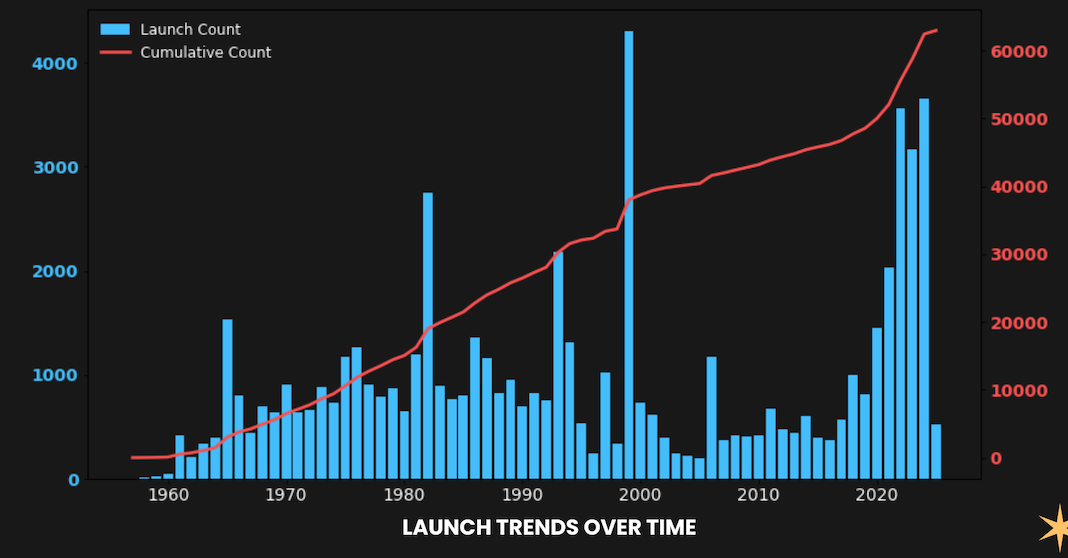

### Visualization 2:

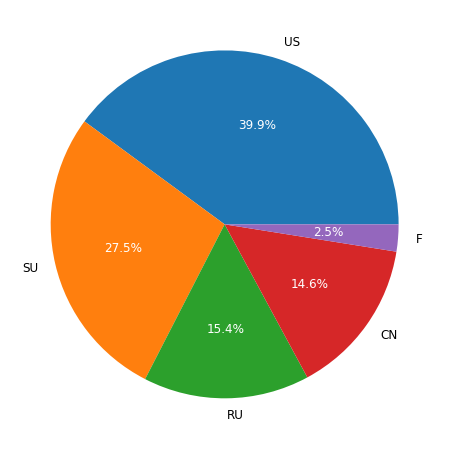

In [5]:
# The Pie colors are changed into country flag in the final editied visuliaztion
# This pie chart is the base for that visualization

state_counts = df['State'].value_counts().nlargest(5)

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    state_counts.values,
    labels=state_counts.index,
    autopct='%1.1f%%',
    textprops=dict(color="White", fontsize=12)
)

# Title editied in photo editor
# ax.set_title('Top 5 countries by Space Activites')

for text in texts:
    text.set_color("Black")

# The background of the visualization was made to be transparent
plt.savefig('V2.png', transparent=True)

plt.show()

#### The Final edited version for Visualization 2:

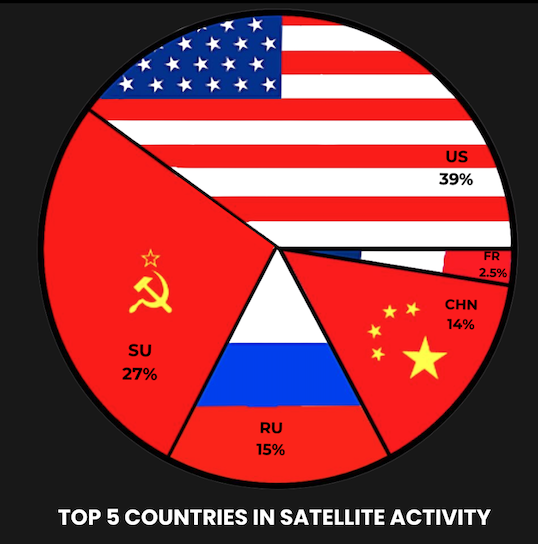

In [6]:
debris_df = df[df['Type'].str.strip().str.startswith('D', na=False)].copy()

debris_df['Launch_Year'] = pd.to_datetime(debris_df['LDate'], errors='coerce').dt.year

debris_df = debris_df[debris_df['Launch_Year'].notna()]

debris_counts = debris_df.groupby('Launch_Year').size().rename("Debris_Count")
cumulative_debris = debris_counts.cumsum().rename("Cumulative_Debris")

debris_trends = pd.concat([debris_counts, cumulative_debris], axis=1)

### Visualization 3:

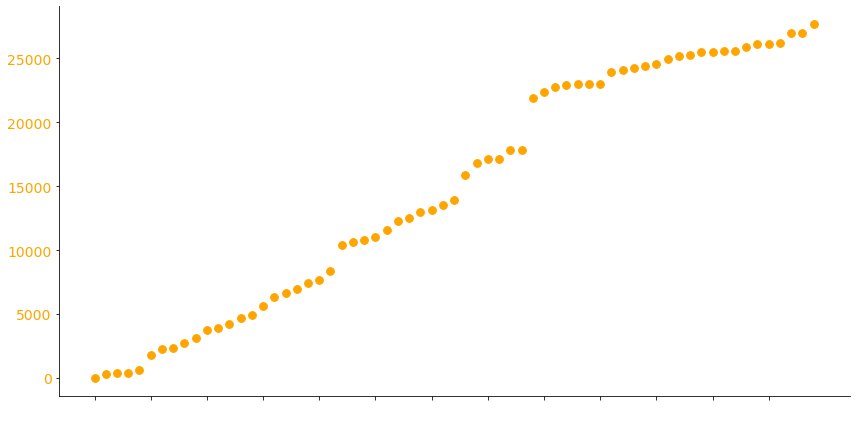

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(debris_trends.index, debris_trends['Cumulative_Debris'], color='orange', s=60)

ax.set_xticks(range(1960,2024,5))

# The X ticks have been given White color, because the inforgraphic background is Black.
# The X label was removed because it is obvious and for tidiness

ax.tick_params(axis='x', labelsize=14, labelcolor='white')
ax.tick_params(axis='y', labelsize=14, labelcolor='orange')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.grid(False)
plt.tight_layout()

# Title added in photo editor
# The background of the visualization was made to be transparent
plt.savefig('V3.png', transparent=True)

plt.show()

#### The Final edited version for Visualization 3:

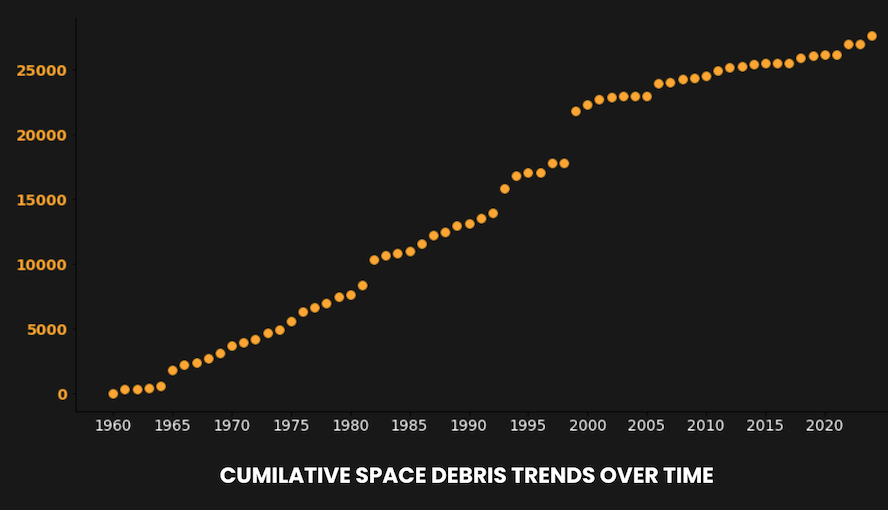

# Infographic:

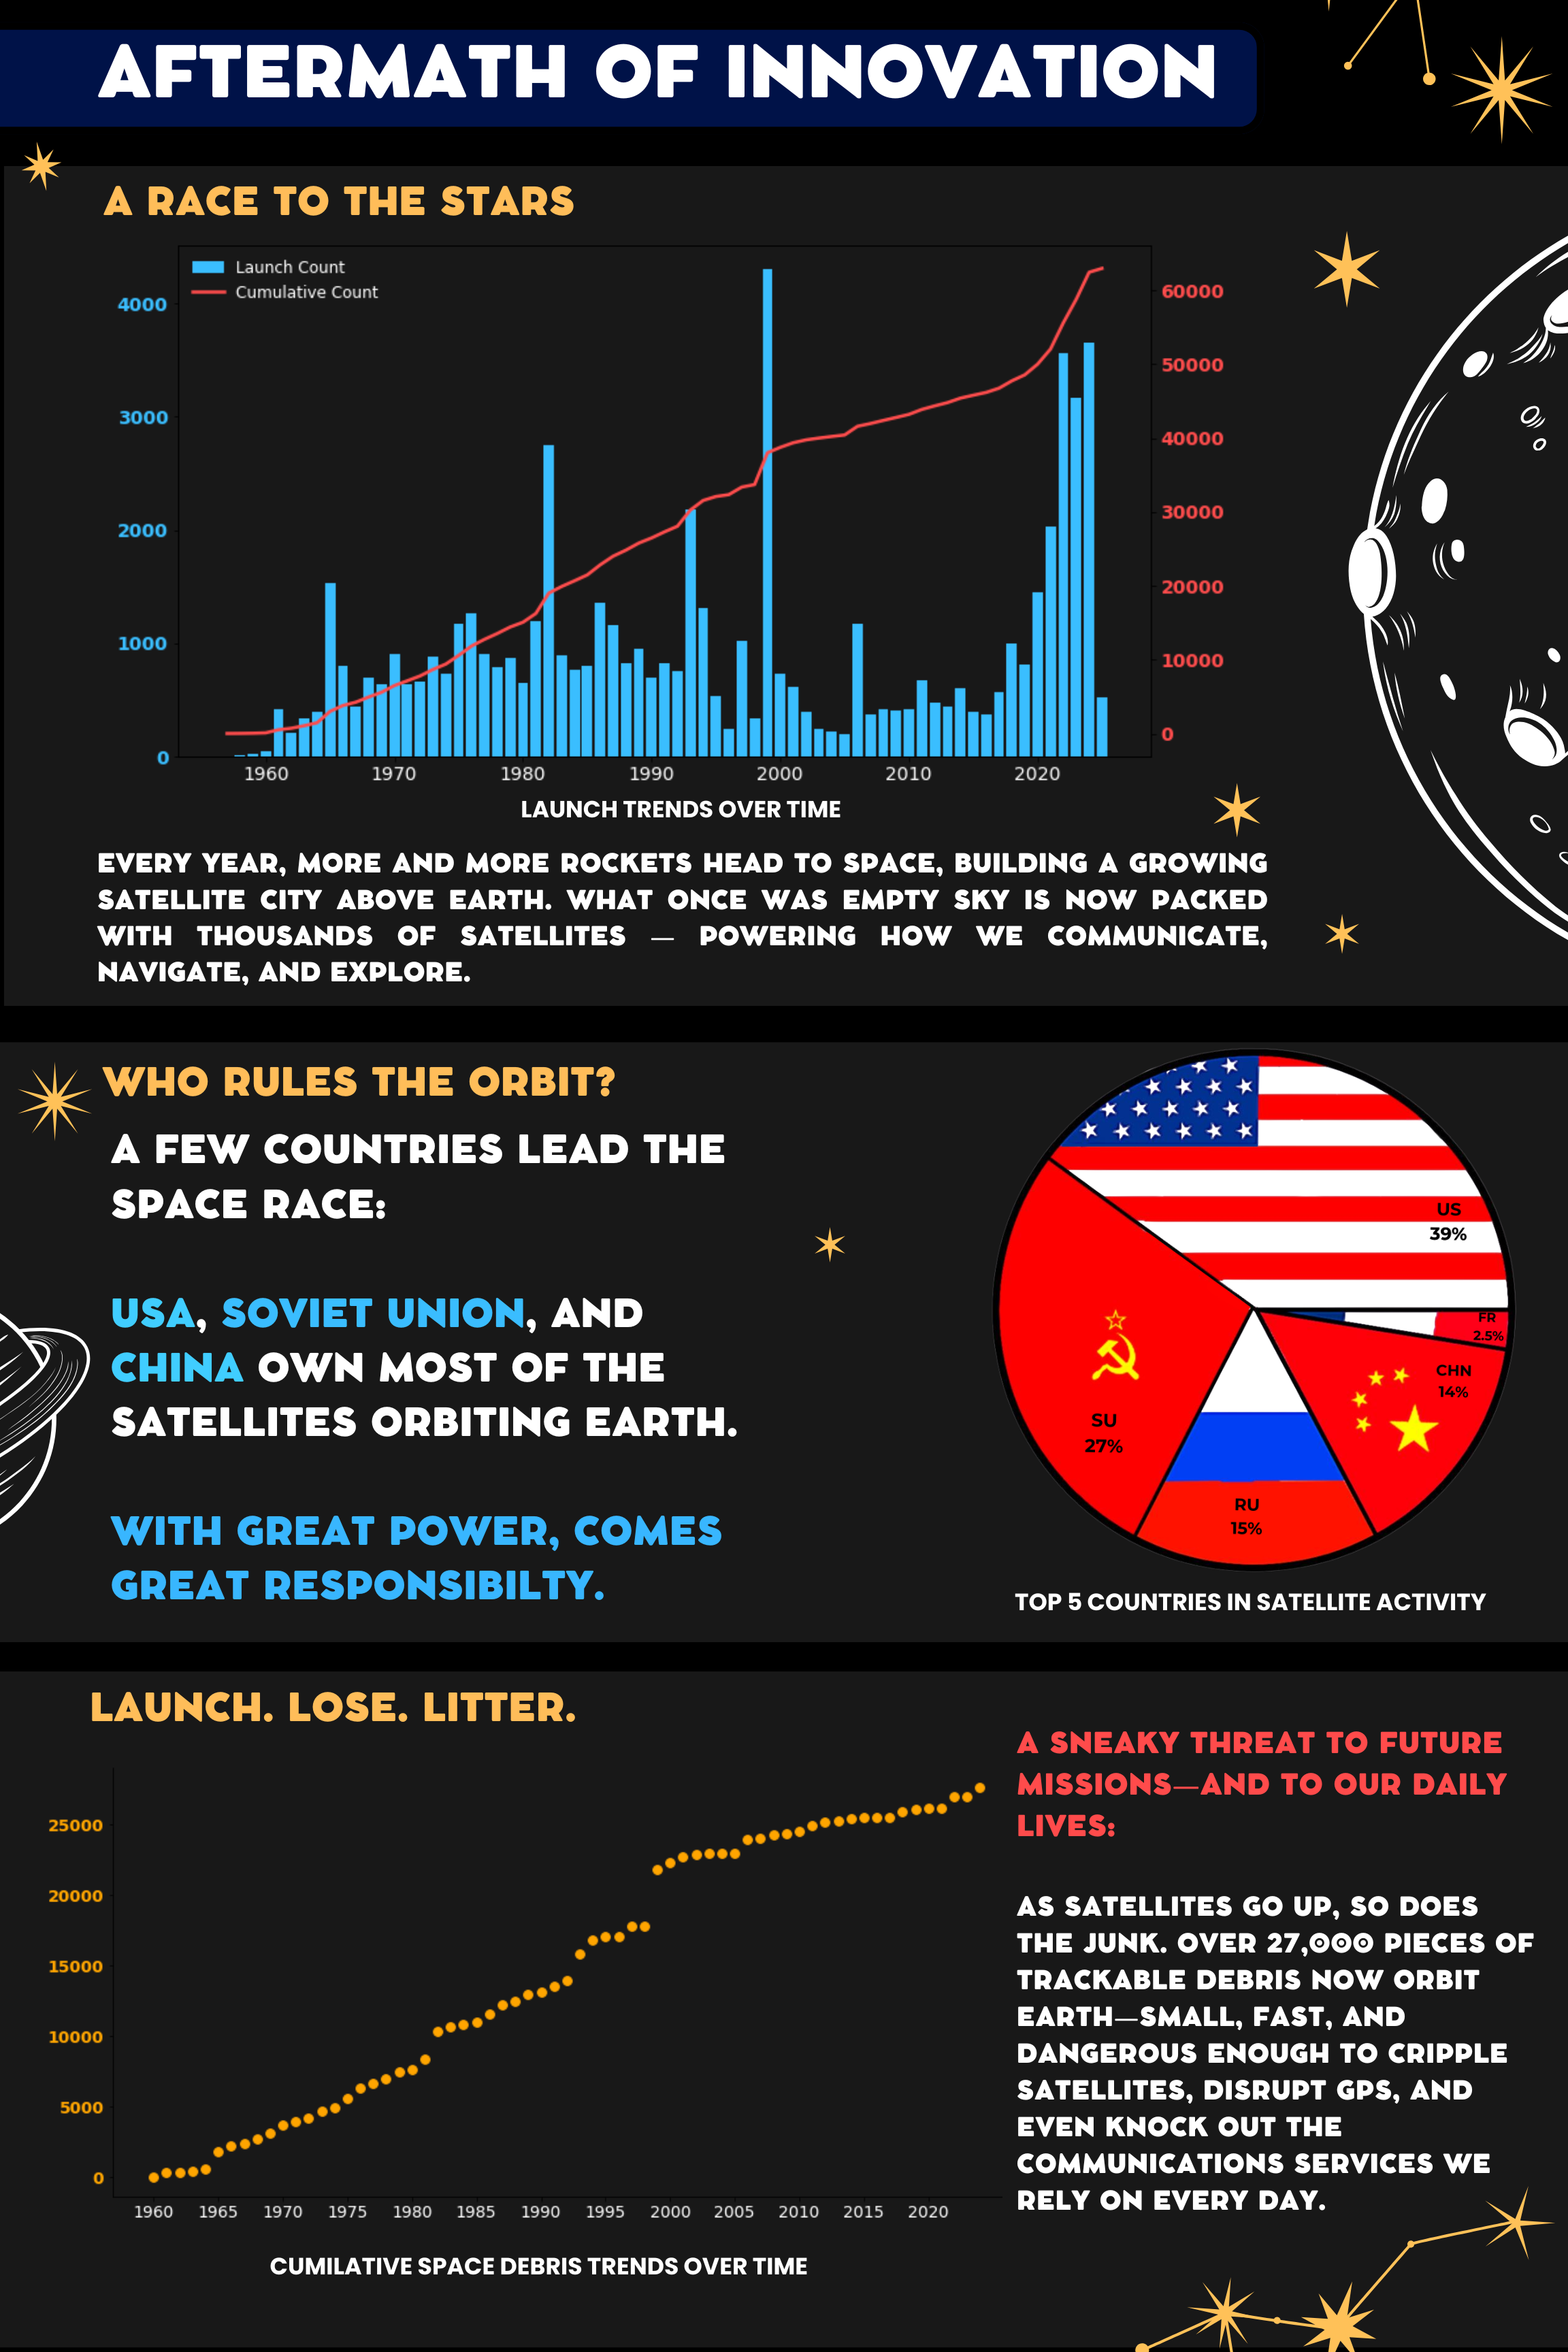

### Attribute:
    1. https://stackoverflow.com/questions/15857647/how-to-export-plots-from-matplotlib-with-transparent-background
    2. Used Canva for editing images and creating Infograghic.
    3. https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.pie.html